# MapReduce and PageRank

In [1]:
!pip install daft
import daft
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

  Running setup.py bdist_wheel for daft ... done
  Stored in directory: /Users/khanhnamle/Library/Caches/pip/wheels/d9/c2/6f/5f6953aeb6d99be7cafda2cfadf907c7d7379a97d8c63a96af
Successfully built daft


## Question 1
Suppose our input data to a map-reduce operation consists of integer values (the keys are not important). The map function takes an integer i and produces the list of pairs (p,i) such that p is a prime divisor of i. For example, map(12) = [(2,12),(3,12)].

The reduce function is addition. That is, reduce(p,[i1,i2,...,ik]) is (p,i1 + i2 + ... + ik).

Compute the output, if the input is the set of integers 15, 21, 24, 30, 49. Then, identify, in the list below, one of the pairs in the output.

* (7,48)
* (2,47)
* (5,45)
* (5,30)

In [28]:
pairs = [(3, 15), (5, 15), (3, 21), (7, 21), (2,24), (3,24), (2,30), (3,30), (5,30), (3, 49), (7, 49)]
d = {}
for prime, num in pairs:
    d[prime] = d.get(prime, 0) + num
    
print d

{2: 54, 3: 139, 5: 45, 7: 70}


## Question 2
Consider three Web pages with the following links:

![pagerank2](pagerank2.gif)

Suppose we compute PageRank with a β of 0.7, and we introduce the additional constraint that the sum of the PageRanks of the three pages must be 3, to handle the problem that otherwise any multiple of a solution will also be a solution. Compute the PageRanks a, b, and c of the three pages A, B, and C, respectively. Then, identify from the list below, the true statement.

* a + c = 1.985
* a + c = 2.745
* a + b = 0.55
* b + c = 2.7

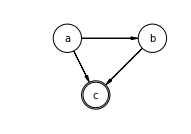

In [30]:
# Instantiate the PGM.
pgm = daft.PGM([3, 2], origin=[0, 0], observed_style="inner", )


# Hierarchical parameters.
pgm.add_node(daft.Node("a", r"a", 1., 1.5))
pgm.add_node(daft.Node("b", r"b", 2.5, 1.5))
pgm.add_node(daft.Node("c", r"c", 1.5, 0.5, observed=True))

# Add in the edges.
pgm.add_edge("a", "b")
pgm.add_edge("b", "c")
pgm.add_edge("a", "c")
pgm.add_edge("c", "c")

# Render and save.
pgm.render()

In [31]:
beta= 0.7
nodes = 3
M = np.matrix([[0,0,0], [0.5,0,0], [0.5,1,1]])
#print M
e = np.matrix(np.repeat(1, nodes))

formula = beta*M+(1-beta)*(1./nodes)*np.multiply(e, e.T)
print formula
print np.sum(formula)

[[0.1  0.1  0.1 ]
 [0.45 0.1  0.1 ]
 [0.45 0.8  0.8 ]]
3.0


In [32]:
#constraint that sum of page ranks adds up to 3
r = np.matrix([1., 1., 1.]).T
#r = np.matrix([1./3, 1./3, 1./3]).T
#print r.shape

for _ in range(5):
    r = np.dot(formula,r)
    
print r[0,0] + r[2,0] # a + c
print r[0,0] + r[1,0] # a + b
print r[1,0] + r[2,0] # b + c

2.5949999999999993
0.705
2.6999999999999993


Answer is a + b equals 0.705

The next two problems refer to the following diagram.

![pagerank3](pagerank3.gif)

## Question 3
Suppose we compute PageRank with β=0.85. Write the equations for the PageRanks a, b, and c of the three pages A, B, and C, respectively. Then, identify in the list below, one of the equations.

* .85a = c + .15b
* c = .9b + .475a
* .95b = .475a + .05c
* .85c = b + .575a

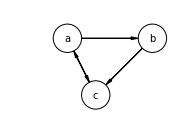

In [33]:
# Instantiate the PGM.
pgm = daft.PGM([3, 2], origin=[0, 0], observed_style="inner", )


# Hierarchical parameters.
pgm.add_node(daft.Node("a", r"a", 1., 1.5))
pgm.add_node(daft.Node("b", r"b", 2.5, 1.5))
pgm.add_node(daft.Node("c", r"c", 1.5, 0.5))

# Add in the edges.
pgm.add_edge("a", "b")
pgm.add_edge("b", "c")
pgm.add_edge("a", "c")
pgm.add_edge("c", "a")

# Render and save.
pgm.render()

In [34]:
beta= 0.85
nodes = 3
M = np.matrix([[0,0,1], [0.5,0,0], [0.5,1,0]])
#print M
e = np.matrix(np.repeat(1, nodes))

formula = beta*M+(1-beta)*(1./nodes)*np.multiply(e, e.T)
print formula

[[0.05  0.05  0.9  ]
 [0.475 0.05  0.05 ]
 [0.475 0.9   0.05 ]]


In [35]:
#constraint that sum of page ranks adds up to 3
r = np.matrix([1., 1., 1.]).T
r = np.matrix([1./3, 1./3, 1./3]).T
#print r.shape

for _ in range(5):
    r = np.dot(formula,r) 
    
a, b, c= r[0,0], r[1,0], r[2,0]

print .85*a, c + .15*b 
print c, .9*b + .475*a 
print .95*b, .475*a + .05*c 
print .85*c, b + .575*a

0.3356619010416666 0.4199473378906249
0.3872726953124999 0.3836236236979166
0.20693940299479163 0.2069394029947916
0.3291817910156249 0.4448963541666666


## Question 4
Assuming no "taxation," compute the PageRanks a, b, and c of the three pages A, B, and C, using iteration, starting with the "0th" iteration where all three pages have rank a = b = c = 1. Compute as far as the 5th iteration, and also determine what the PageRanks are in the limit. Then, identify the true statement from the list below. null

* In the limit, a = 5/4
* In the limit, b = 3/5
* In the limit, b = 5/8
* In the limit, c = 9/7

In [36]:
beta= 0.85
nodes = 3
M = np.matrix([[0,0,1], [0.5,0,0], [0.5,1,0]])
e = np.matrix(np.repeat(1, nodes))

formula = M #+(1-beta)*(1./nodes)*np.multiply(e, e.T)
print formula

[[0.  0.  1. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]]


In [37]:
#constraint that sum of page ranks adds up to 3
r = np.matrix([1., 1., 1.]).T
#r = np.matrix([1./3, 1./3, 1./3]).T
#print r.shape

for _ in range(1000):
    r = np.dot(formula,r) 
    
a, b, c= r[0,0], r[1,0], r[2,0]
print a
print b
print c

1.2000000000000002
0.6000000000000001
1.2000000000000002


Thus, in the limit, b = 0.6 = 3/5.